# Aprendizado Supervisionado II - Trabalho 2

## Pacotes

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from utils import make_dist_plot, make_roc_curve

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn import metrics

## Pré-Processamento

In [2]:
wine = pd.read_csv('C:\\Users\\malta\\Desktop\\Pós Graduação\\Apredizado Supervisionado II\\Atividade 2\\winequality-red.csv', 
                  encoding='ansi')

In [3]:
#Criando categorias "Ruim" e "Bom" para os níveis de qualidade.
#'Ruim' = 0 até 6, 'Bom' = 7 até 10
bins = [0, 7, 10]
names = ['Ruim', 'Bom']

d = dict(enumerate(names, 1))

wine['categoria'] = np.vectorize(d.get)(np.digitize(wine['quality'], bins))

Foram definidas duas categorias para a classificação da qualidade: 'Ruim' = 0 até 6, 'Bom' = 7 até 10. Observamos um total de 1382 observações como 'Ruim' e 217 como 'Bom'. Não houveram observações com valores nulos.

In [4]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Ruim
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Ruim
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Ruim
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Ruim
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Ruim


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  categoria             1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [6]:
wine["categoria"].value_counts()

Ruim    1382
Bom      217
Name: categoria, dtype: int64

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
categoria               0
dtype: int64

## Análise Exploratória

Foram observadas 86.4% das observações como 'Ruim' e apenas 13.6% como 'Bom'. O gráfico de barras mostra que a maior parte das observações está concentrada entre notas de qualidade '5' e '6', englobadas dentro da categoria 'Ruim'. Além disso, a menor das observações tem nota em qualidade '3' e a maior tem nota '8'.

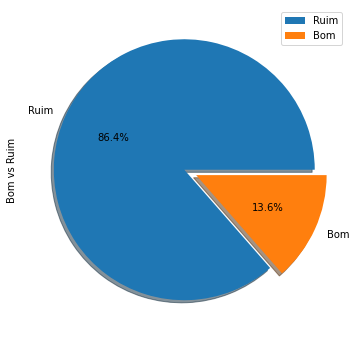

In [9]:
wine['categoria'].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel('Bom vs Ruim')
plt.legend(['Ruim', 'Bom'])
plt.show()

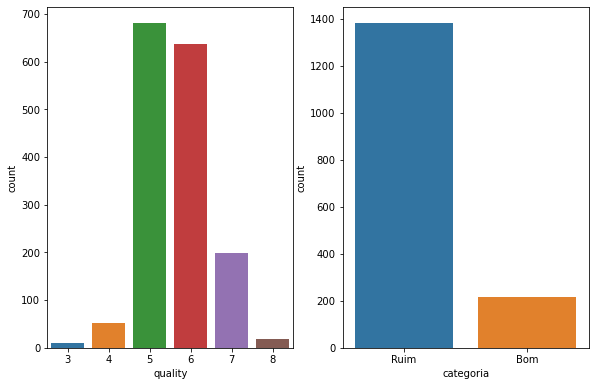

In [10]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))

sns.countplot(x='quality',data=wine, ax=axs[0])
sns.countplot(x="categoria",data=wine, ax=axs[1])

### Boxplots

Os boxplots evidenciam um grande número de outliers para a maioria das variáveis. Podemos observar que para a a categoria 'Bom' as variáveis 'fixed acidity', 'citric acid', 'sulphates' e 'alcohol' tem médias maiores do que para 'Ruim'. Já 'volatile acidity', 'free sulfur dioxide', 'total sulfor dioxide' e 'density' tem médias maiores para 'Ruim'. As variáveis 'residual sugar', 'chlorides' e 'ph' tem médias semelhantes para ambas as categorias.

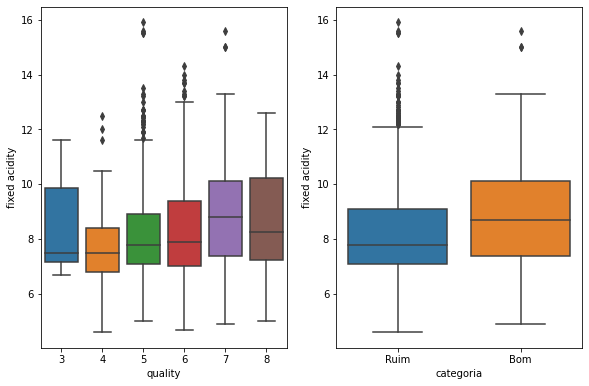

In [11]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))

sns.boxplot(x="quality",y='fixed acidity',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='fixed acidity',data=wine, ax=axs[1])

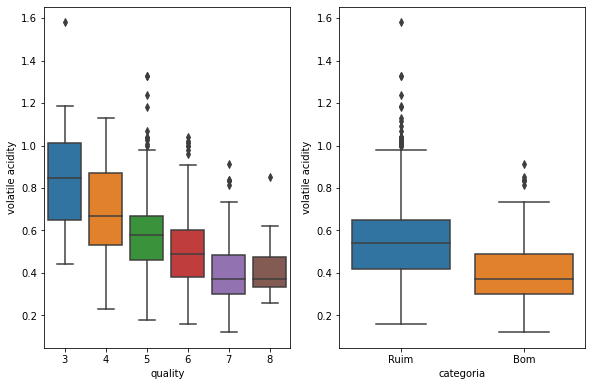

In [12]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))

sns.boxplot(x="quality",y='volatile acidity',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='volatile acidity',data=wine, ax=axs[1])

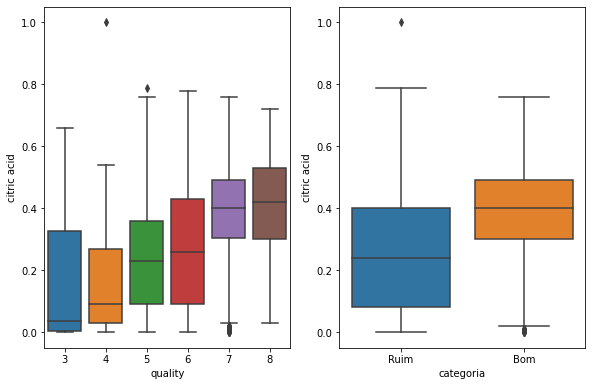

In [13]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))

sns.boxplot(x="quality",y='citric acid',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='citric acid',data=wine, ax=axs[1])

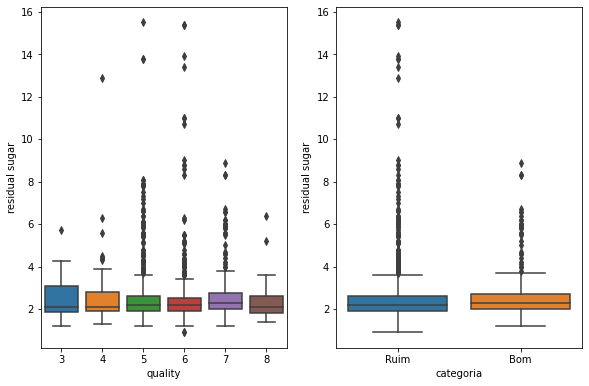

In [14]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))
sns.boxplot(x="quality",y='residual sugar',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='residual sugar',data=wine, ax=axs[1])

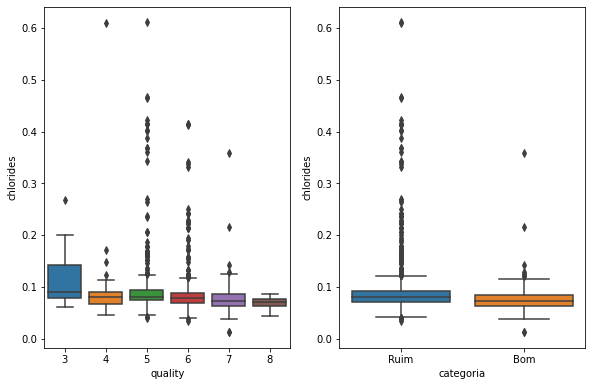

In [15]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))
sns.boxplot(x="quality",y='chlorides',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='chlorides',data=wine, ax=axs[1])

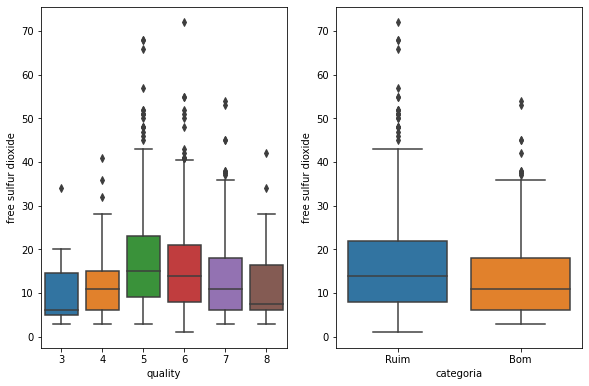

In [16]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))
sns.boxplot(x="quality",y='free sulfur dioxide',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='free sulfur dioxide',data=wine, ax=axs[1])

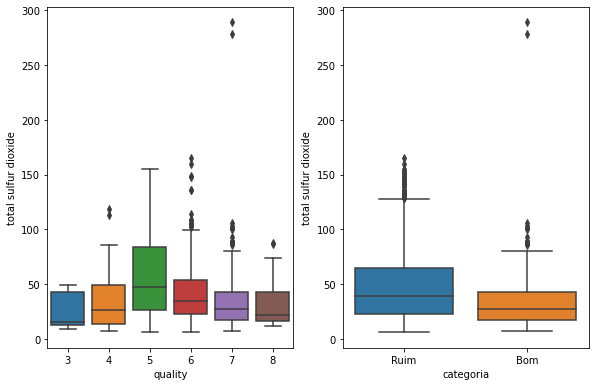

In [17]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))
sns.boxplot(x="quality",y='total sulfur dioxide',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='total sulfur dioxide',data=wine, ax=axs[1])

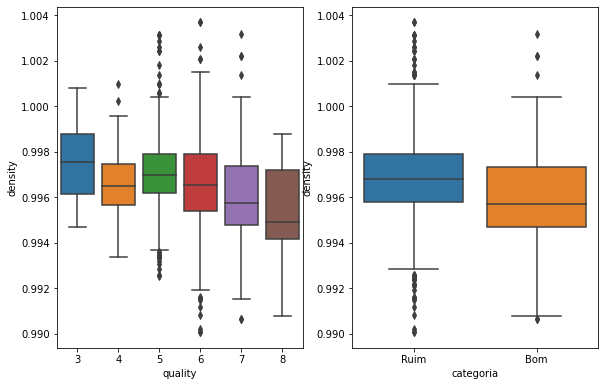

In [18]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))
sns.boxplot(x="quality",y='density',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='density',data=wine, ax=axs[1])

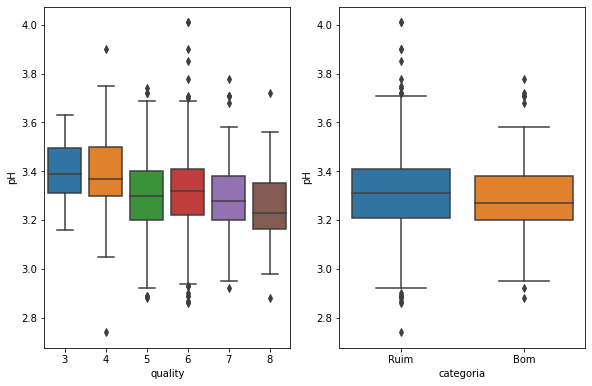

In [19]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))
sns.boxplot(x="quality",y='pH',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='pH',data=wine, ax=axs[1])

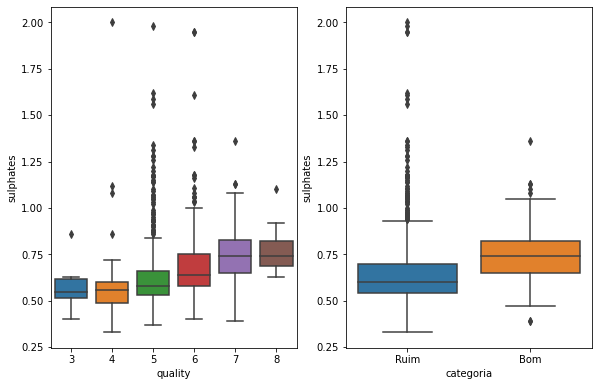

In [20]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))
sns.boxplot(x="quality",y='sulphates',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='sulphates',data=wine, ax=axs[1])

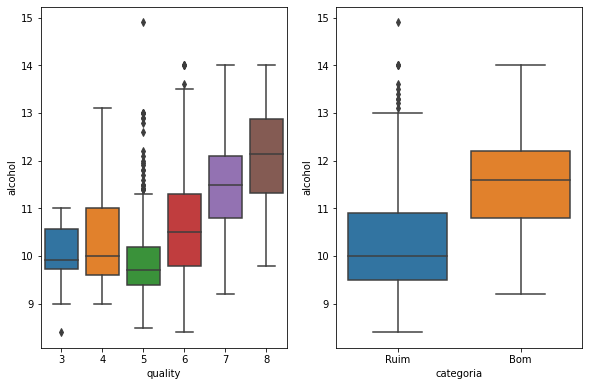

In [21]:
fig, axs = plt.subplots(ncols=2,figsize=(9.7, 6.27))
sns.boxplot(x="quality",y='alcohol',data=wine, ax=axs[0])
sns.boxplot(x="categoria",y='alcohol',data=wine, ax=axs[1])

### Correlação

As variáveis apresentam altas correlações. Olhando para o conjunto com todos os dados, entre as variáveis com os maiores valores, chamam a atenção 0.67 de correlação entre 'fixed acidity' e 'citric acid', 0.67 entre 'fixed acidity' e 'density', -0.68 entre 'fixed acidity' e 'ph', e 0.67 entre 'free sulphor dioxide' e 'total sulphor dioxide'.

Se filtrarmos pela categoria 'Bom' temos 0.7 de correlação entre 'fixed acidity' e 'citric acid', 0.7 entre 'fixed acidity' e 'density', -0.73 entre 'fixed acidity' e 'ph', e 0.67 entre 'free sulphor dioxide' e 'total sulphor dioxide'. Muito semelhantes às correlações do conjunto todo.

Para a categoria 'Ruim' as correlações parecem seguir valores semelhantes. Maiores para alguns pares e menores para outros, mas ainda assim semelhante ao conjunto todo.

C:\Users\malta\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


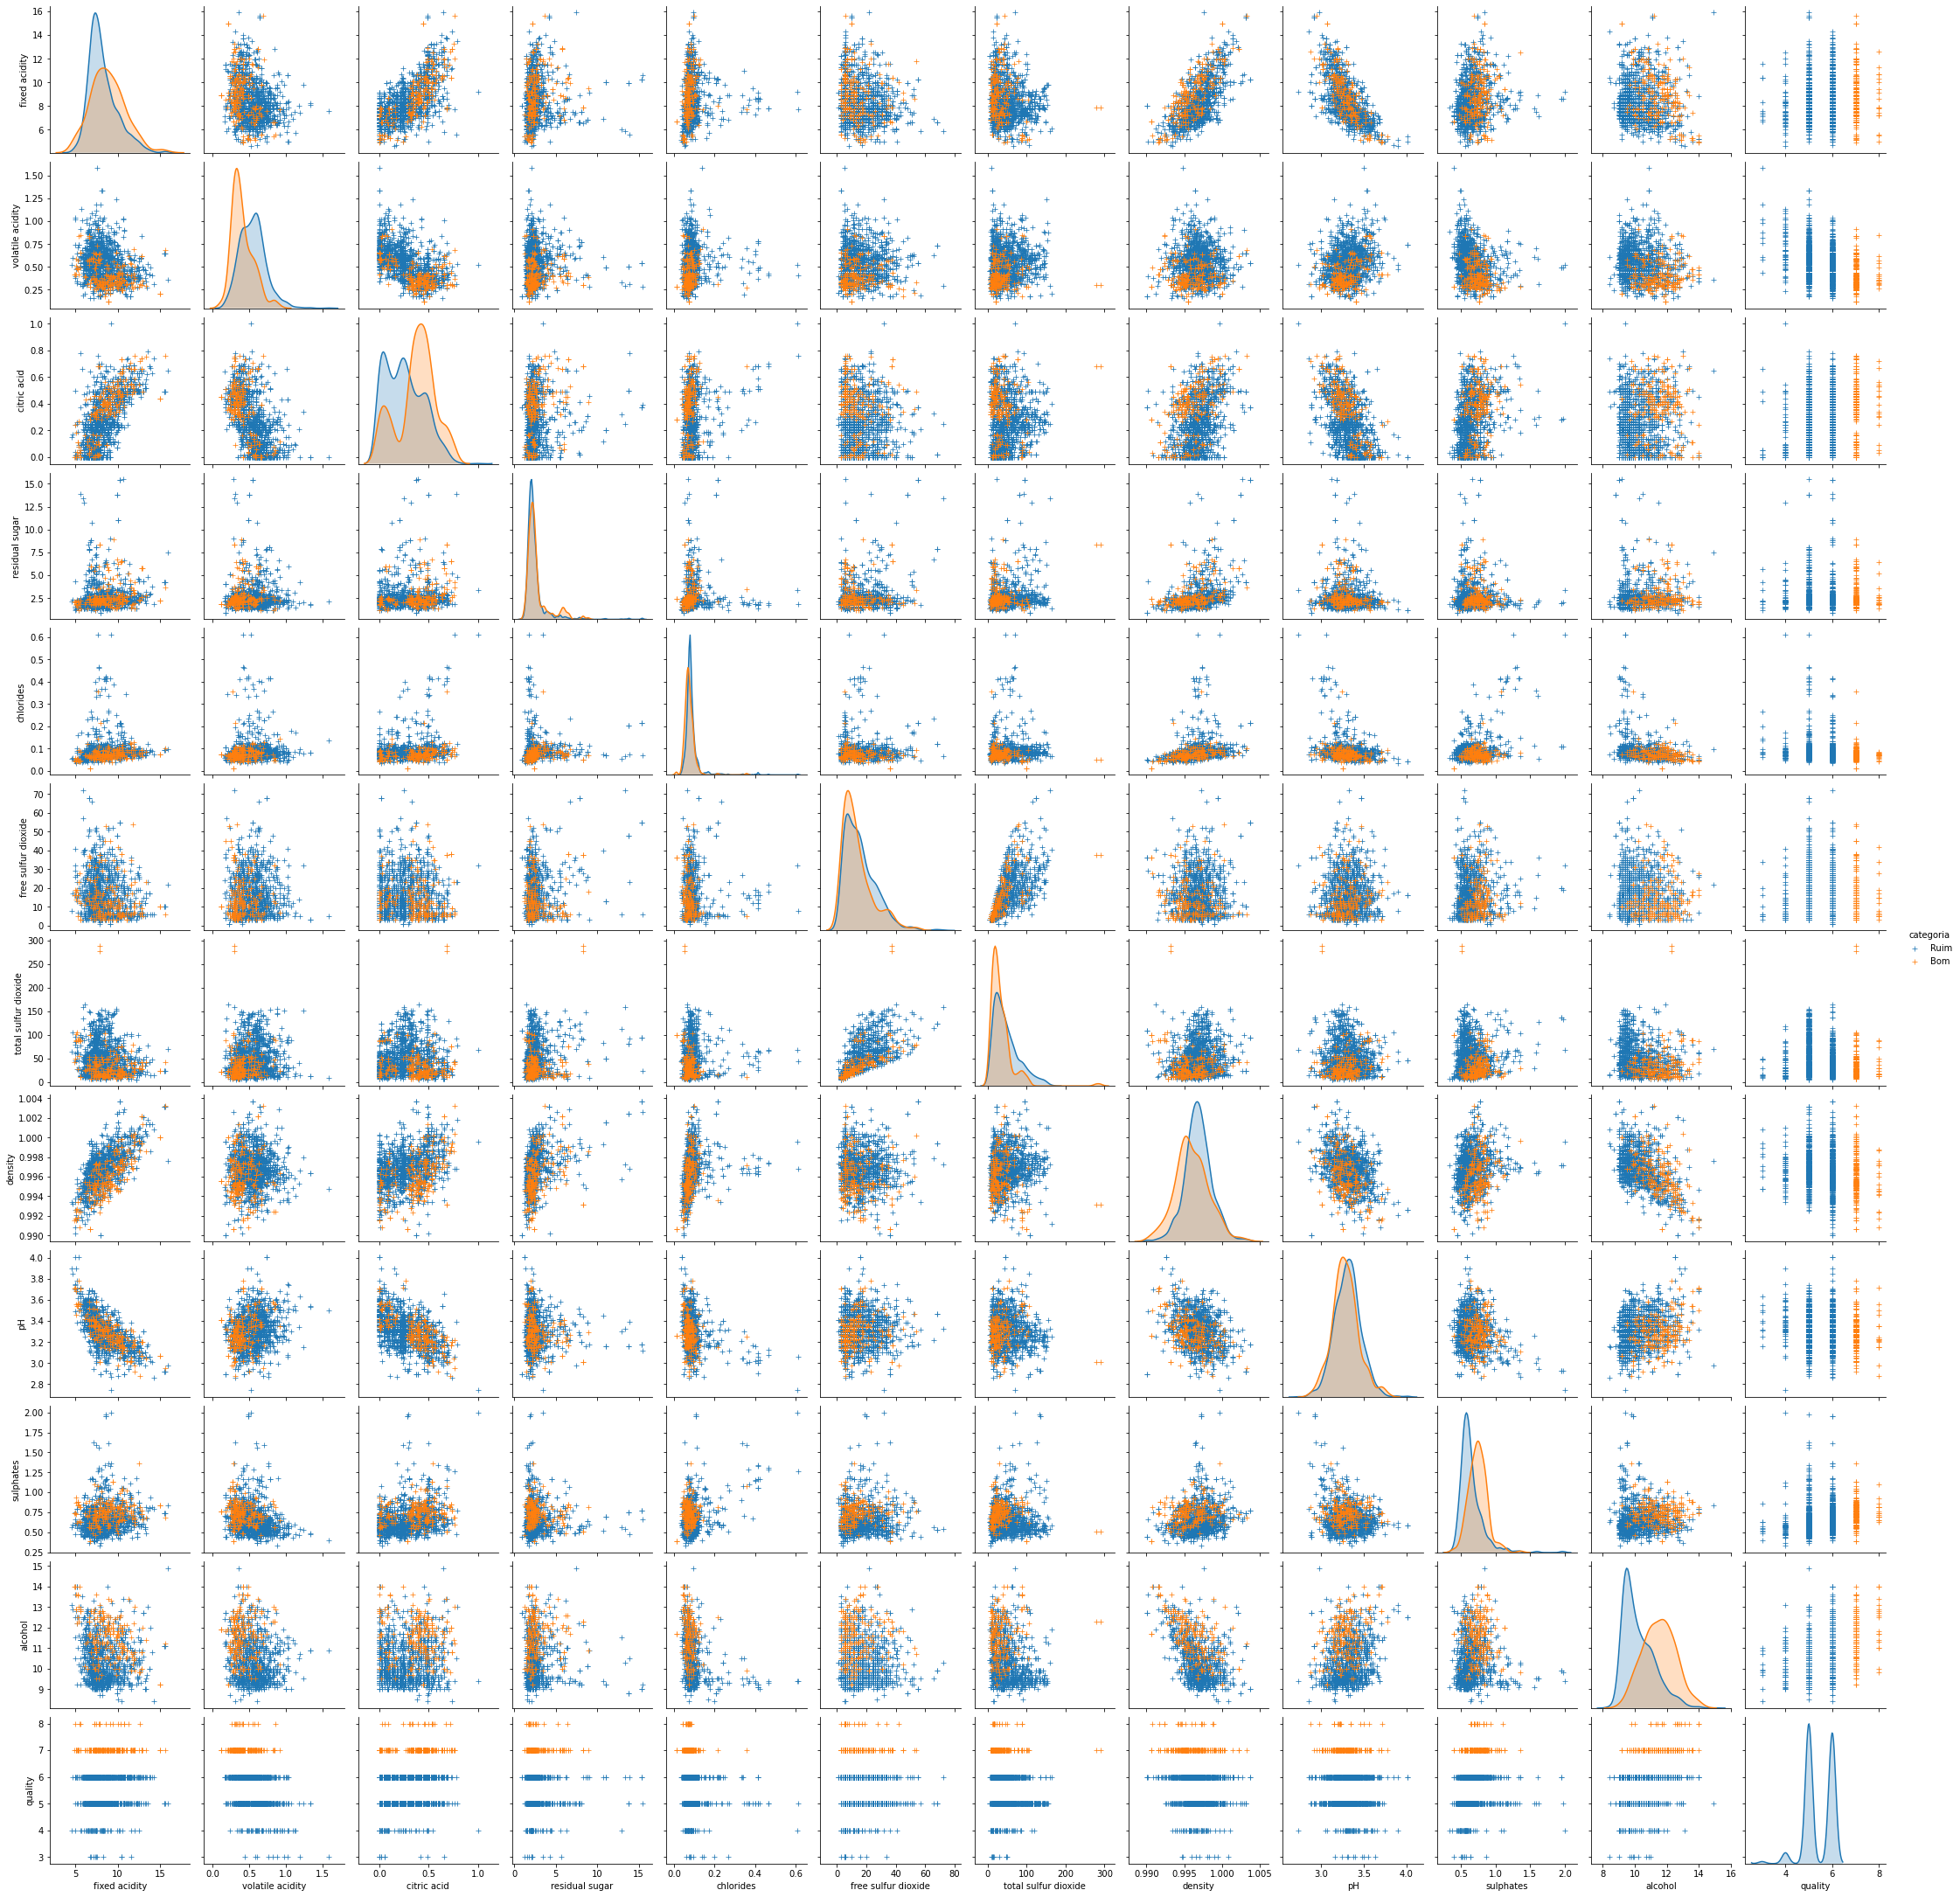

In [22]:
#Correlação
sns.pairplot(wine, hue = 'categoria', markers = '+')
plt.show()

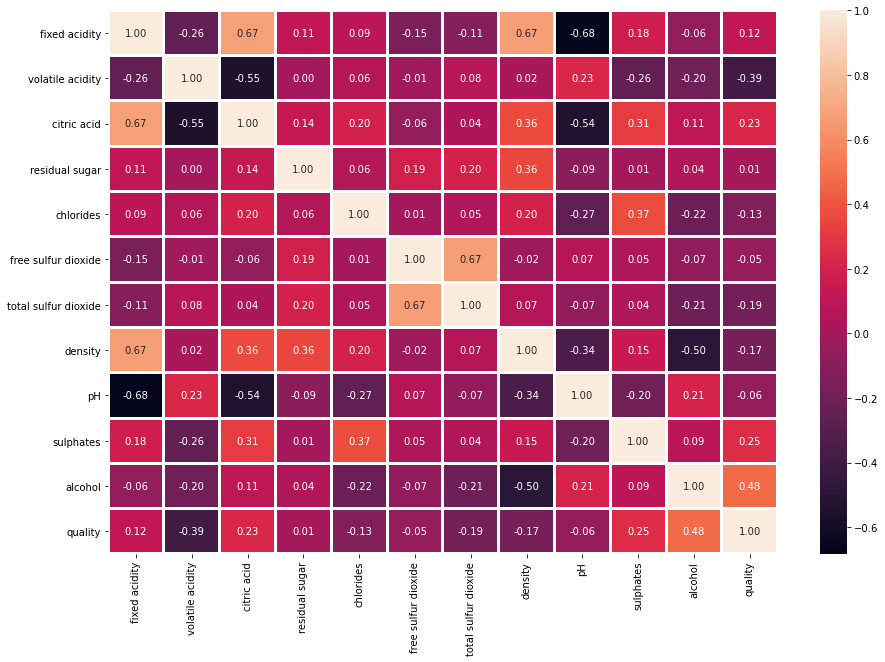

In [23]:
#Matriz de Correlação
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), annot=True, fmt='.2f', linewidths=2)

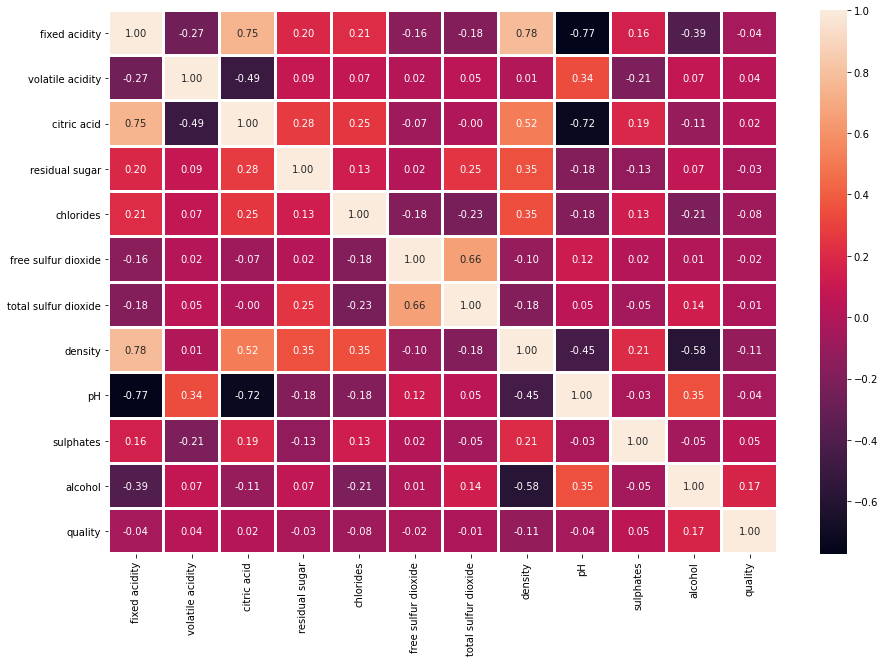

In [24]:
#Matriz de Correlação
plt.figure(figsize=(15,10))
sns.heatmap(wine[wine['categoria']=='Bom'].corr(), annot=True, fmt='.2f', linewidths=2)

In [25]:
wine[wine['categoria']=='Bom'].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.265124,0.745279,0.195400,0.213242,-0.158259,-0.182429,0.781722,-0.771242,0.155840,-0.391694,-0.042254
volatile acidity,-0.265124,1.000000,-0.494798,0.089458,0.072973,0.017497,0.045419,0.008009,0.342638,-0.208232,0.074566,0.037022
citric acid,0.745279,-0.494798,1.000000,0.277449,0.253127,-0.070361,-0.001173,0.516376,-0.721072,0.185814,-0.106004,0.022656
residual sugar,0.195400,0.089458,0.277449,1.000000,0.129603,0.017601,0.252391,0.349889,-0.181743,-0.125120,0.071758,-0.028967
chlorides,0.213242,0.072973,0.253127,0.129603,1.000000,-0.179641,-0.229015,0.345423,-0.180250,0.129020,-0.210308,-0.079045
free sulfur dioxide,-0.158259,0.017497,-0.070361,0.017601,-0.179641,1.000000,0.659703,-0.104752,0.119722,0.017191,0.008409,-0.020729
total sulfur dioxide,-0.182429,0.045419,-0.001173,0.252391,-0.229015,0.659703,1.000000,-0.182686,0.049723,-0.045562,0.136670,-0.013373
density,0.781722,0.008009,0.516376,0.349889,0.345423,-0.104752,-0.182686,1.000000,-0.449245,0.208765,-0.584117,-0.112030
pH,-0.771242,0.342638,-0.721072,-0.181743,-0.180250,0.119722,0.049723,-0.449245,1.000000,-0.027010,0.349997,-0.042111
sulphates,0.155840,-0.208232,0.185814,-0.125120,0.129020,0.017191,-0.045562,0.208765,-0.027010,1.000000,-0.052293,0.054699


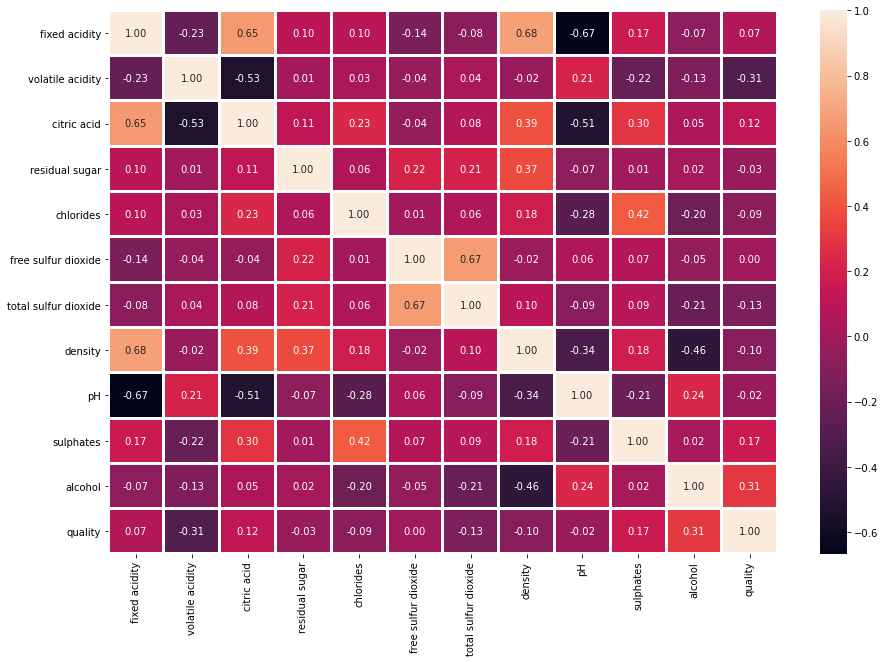

In [26]:
#Matriz de Correlação
plt.figure(figsize=(15,10))
sns.heatmap(wine[wine['categoria']=='Ruim'].corr(), annot=True, fmt='.2f', linewidths=2)

In [27]:
wine[wine['categoria']=='Ruim'].corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.231362,0.652258,0.095041,0.097930,-0.144930,-0.082652,0.680404,-0.667107,0.166422,-0.070536,0.065930
volatile acidity,-0.231362,1.000000,-0.531393,0.006305,0.033919,-0.037338,0.040069,-0.024190,0.214097,-0.220574,-0.128702,-0.314900
citric acid,0.652258,-0.531393,1.000000,0.114960,0.232398,-0.043092,0.078760,0.391931,-0.514569,0.295298,0.046815,0.116177
residual sugar,0.095041,0.006305,0.114960,1.000000,0.055227,0.216747,0.205948,0.371781,-0.068276,0.010217,0.017517,-0.029238
chlorides,0.097930,0.033919,0.232398,0.055227,1.000000,0.014358,0.058627,0.177104,-0.284171,0.421170,-0.201562,-0.085702
free sulfur dioxide,-0.144930,-0.037338,-0.043092,0.216747,0.014358,1.000000,0.666832,-0.020011,0.058401,0.073714,-0.052390,0.001920
total sulfur dioxide,-0.082652,0.040069,0.078760,0.205948,0.058627,0.666832,1.000000,0.096057,-0.094943,0.087730,-0.213057,-0.133892
density,0.680404,-0.024190,0.391931,0.371781,0.177104,-0.020011,0.096057,1.000000,-0.338016,0.182941,-0.462703,-0.100513
pH,-0.667107,0.214097,-0.514569,-0.068276,-0.284171,0.058401,-0.094943,-0.338016,1.000000,-0.209937,0.235173,-0.023487
sulphates,0.166422,-0.220574,0.295298,0.010217,0.421170,0.073714,0.087730,0.182941,-0.209937,1.000000,0.022205,0.166191


## Classificadores

Foram utilizados três classificadores nesse trabalho: Análise de discriminante linear (LDA), Análise de discriminante quadrática (QDA) e Naive Bayes Gaussiano. Dividimos as amostras em 70% para treino e 30% para teste.

In [28]:
wineCopy = wine.copy()

In [29]:
X = wineCopy.drop(columns = ['categoria','quality'])
y = [1 if value == 'Bom' else 0 for value in wineCopy['categoria']]
results = []

In [30]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size = test_size)

### Análise de discriminante linear

Score :  0.8618083855799371
Linear Discriminant Analysis Accuracy:  0.825


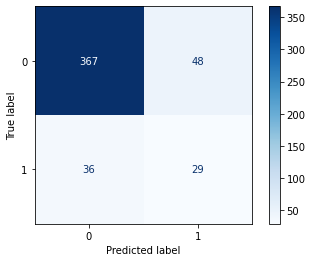

In [31]:
#lda
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred_lda = LDA.predict(X_test)

CM = confusion_matrix(y_test, y_pred_lda)
acc = accuracy_score(y_test, y_pred_lda)
#score = LDA.score(X_test, y_test)
score = cross_val_score(LDA, X, y, cv=5) # cross-validation
results.append(acc)

print("Score : ", score.mean())
print("Linear Discriminant Analysis Accuracy: ", acc)

plot_confusion_matrix(LDA, X_test, y_test, cmap= "Blues")  
plt.show()

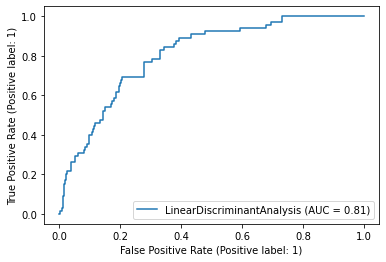

In [32]:
metrics.plot_roc_curve(LDA, X_test, y_test)

In [33]:
target_names = ['Ruim', 'Bom']
print(classification_report(y_test, y_pred_lda, target_names=target_names))

              precision    recall  f1-score   support

        Ruim       0.91      0.88      0.90       415
         Bom       0.38      0.45      0.41        65

    accuracy                           0.82       480
   macro avg       0.64      0.67      0.65       480
weighted avg       0.84      0.82      0.83       480



In [34]:
cross_val_score(LDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True))

array([0.88481236, 0.86197632, 0.91987813, 0.83275692, 0.87925514])

In [35]:
cross_val_score(LDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False))

array([0.21818182, 0.47311828, 0.55072464, 0.47540984, 0.43333333])

### Análise de discriminante quadrático

Score :  0.8105446708463951
Quadratic Discriminant Analysis Accuracy:  0.8041666666666667


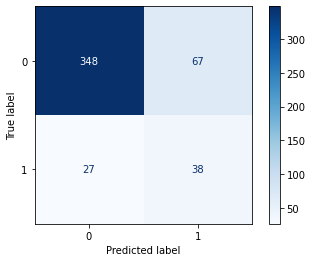

In [36]:
#qda
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)
y_pred_qda = QDA.predict(X_test)
CM = confusion_matrix(y_test, y_pred_qda)

acc = accuracy_score(y_test, y_pred_qda)
#score = QDA.score(X_test, y_test)
score = cross_val_score(QDA, X, y, cv=5) # cross-validation
results.append(acc)

print("Score : ", score.mean())
print("Quadratic Discriminant Analysis Accuracy: ", acc)

plot_confusion_matrix(QDA, X_test, y_test, cmap= "Blues")  
plt.show()

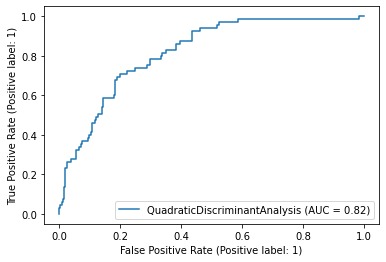

In [37]:
metrics.plot_roc_curve(QDA, X_test, y_test)

In [38]:
target_names = ['Ruim', 'Bom']
print(classification_report(y_test, y_pred_qda, target_names=target_names))

              precision    recall  f1-score   support

        Ruim       0.93      0.84      0.88       415
         Bom       0.36      0.58      0.45        65

    accuracy                           0.80       480
   macro avg       0.64      0.71      0.66       480
weighted avg       0.85      0.80      0.82       480



In [39]:
cross_val_score(QDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True))

array([0.89245235, 0.8028713 , 0.90522069, 0.75650527, 0.83400741])

In [40]:
cross_val_score(QDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False))

array([0.25      , 0.42857143, 0.55      , 0.41463415, 0.43835616])

### Naive Bayes Gaussiano

In [41]:
#Gaussian Naive Bayes
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred_nb = NB.predict(X_test)
CM = confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred_nb)
#score = NB.score(X_test, y_test)
score = cross_val_score(NB, X, y, cv=5) # cross-validation
results.append(acc)

print("Score : ", score.mean())
print("Gaussian Naive Bayes Accuracy: ", acc)

plot_confusion_matrix(NB, X_test, y_test, cmap= "Blues")  
plt.show()

NameError: name 'y_pred' is not defined

In [ ]:
metrics.plot_roc_curve(NB, X_test, y_test)

In [ ]:
target_names = ['Ruim', 'Bom']
print(classification_report(y_test, y_pred_nb, target_names=target_names))

In [ ]:
cross_val_score(NB, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True))

In [ ]:
cross_val_score(NB, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False))

## Comparando

Foi utilizada validação cruzada para 5 iterações para cada um dos modelos. O modelo que apresentou a melhor acurácia foi o LDA com 0.87, contra 0.83 do QDA e 0.84 do Naive Bayes Gaussiano. O plot de comparação entre a curva ROC de cada modelo confirma essa informação, onde a maior área entre a curva também é do LDA com AUC igual a 0.89. Apesar da alta acurácia , ao observarmos a matriz de confusão o modelo LDA apresenta a maior taxa de falsos positivos.

In [ ]:
print("LDA cross-validation score: ", cross_val_score(LDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print("QDA cross-validation score: ",cross_val_score(QDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print("Naive Bayes cross-validation score: ",cross_val_score(NB, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

In [ ]:
print(cross_val_score(NB, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(LDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print(cross_val_score(QDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

In [ ]:
plt.figure(figsize=(10,8))

fig1 = metrics.plot_roc_curve(LDA, X_test, y_test)

fig2 = metrics.plot_roc_curve(QDA, X_test, y_test,ax=fig1.ax_)
fig2.figure_.suptitle("ROC curve comparison")

fig3 = metrics.plot_roc_curve(NB, X_test, y_test,ax=fig1.ax_)
fig3.figure_.suptitle("ROC curve comparison")

plt.legend(loc=0)

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_lda))
print(metrics.accuracy_score(y_test, y_pred_lda))
print(metrics.f1_score(y_test, y_pred_lda))

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_qda))
print(metrics.accuracy_score(y_test, y_pred_qda))
print(metrics.f1_score(y_test, y_pred_qda))

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred_nb))
print(metrics.accuracy_score(y_test, y_pred_nb))
print(metrics.f1_score(y_test, y_pred_nb))

## Conclusão

A análise exploratória dos dados de vinhos mostrou um viéis grande quando selecionamos a nota de corte para bons vinhos como maiores ou iguais a 7, com a maior parte das observações sendo consideradas ruins. Além disso, o número extremamente grande de outliers parece ter afetado a precisão da modelagem. Seria interessante remover essas observações e testar os modelos novamente. A alta correlação entre as variáveis pode ter tido um efeito negativo nas previsões também.

Foram utilizados os três classificadores apresentados em aula: LDA, QDA e Naive Bayes. Estes modelos não apresentaram resultados muito diferentes em relação a acurácia, se diferenciando mais em relação a captura de casos verdadeiros positivos e verdadeiros negativos. O LDA apresentou uma vantagem marginal em relação aos outros em termos de acurácia e AUC, logo foi selecionado como o melhor classificador para esse trabalho. 

O modelo selecionado como o melhor é muito bom para a classificação de verdadeiros negativos, ou seja, detectar os casos em que o vinho está entre os níveis de qualidade 3 e 6 inclusive. No entanto, a taxa de falsos positivos é muito alta. Se a demanda fosse pela detecção dos vinhos bons com alta precisão, deveríamos investigar um outro modelo mais eficiente.

## Apêndice: Alguns outros modelos

Aqui foram testados alguns outros modelos que não foram vistos em aula, apenas como teste. Tentei implementar o SVM visto na aula 5, mas não deu muito certo.

### Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_lr)

acc = accuracy_score(y_test, y_pred_lr)
#score = NB.score(X_test, y_test)
score = cross_val_score(lr, X, y, cv=5) # cross-validation
results.append(acc)

print("Score : ", score.mean())
print("Logistic Regression Accuracy: ", acc)

plot_confusion_matrix(lr, X_test, y_test, cmap= "Blues")  
plt.show()

In [ ]:
metrics.plot_roc_curve(lr, X_test, y_test)

In [ ]:
target_names = ['Ruim', 'Bom']
print(classification_report(y_test, y_pred_lr, target_names=target_names))

In [ ]:
cross_val_score(lr, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True))

In [ ]:
cross_val_score(lr, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False))


In [ ]:
cross_val_score(lr, X, y,cv=5)

### Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred_rf)
#score = NB.score(X_test, y_test)
score = cross_val_score(rf, X, y, cv=5) # cross-validation
results.append(acc)

print("Score : ", score.mean())
print("Random Forest Accuracy: ", acc)

plot_confusion_matrix(rf, X_test, y_test, cmap= "Blues")  
plt.show()

In [ ]:
metrics.plot_roc_curve(rf, X_test, y_test)

In [ ]:
target_names = ['Ruim', 'Bom']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

In [ ]:
cross_val_score(rf, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True))

In [ ]:
cross_val_score(rf, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False))

In [ ]:
cross_val_score(rf, X, y,cv=5)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred_dt)

acc = accuracy_score(y_test, y_pred_dt)
#score = NB.score(X_test, y_test)
score = cross_val_score(dt, X, y, cv=5) # cross-validation
results.append(acc)

print("Score : ", score.mean())
print("Random Forest Accuracy: ", acc)

plot_confusion_matrix(rf, X_test, y_test, cmap= "Blues")  
plt.show()

In [ ]:
metrics.plot_roc_curve(dt, X_test, y_test)

In [ ]:
target_names = ['Ruim', 'Bom']
print(classification_report(y_test, y_pred_dt, target_names=target_names))

### Comparando com outros modelos

In [ ]:
print("LDA cross-validation score: ", cross_val_score(LDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print("QDA cross-validation score: ",cross_val_score(QDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print("Naive Bayes cross-validation score: ",cross_val_score(NB, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print("Logistic regression cross-validation score: ",cross_val_score(lr, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print("Random forest cross-validation score: ",cross_val_score(rf, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

print("Decision tree cross-validation score: ",cross_val_score(dt, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.roc_auc_score, greater_is_better = True, needs_proba = True)).mean())

In [ ]:
plt.figure(figsize=(10,8))

fig1 = metrics.plot_roc_curve(LDA, X_test, y_test)

fig2 = metrics.plot_roc_curve(QDA, X_test, y_test,ax=fig1.ax_)
fig2.figure_.suptitle("ROC curve comparison")

fig3 = metrics.plot_roc_curve(NB, X_test, y_test,ax=fig1.ax_)
fig3.figure_.suptitle("ROC curve comparison")

fig4 = metrics.plot_roc_curve(lr, X_test, y_test,ax=fig1.ax_)
fig4.figure_.suptitle("ROC curve comparison")

fig5 = metrics.plot_roc_curve(rf, X_test, y_test,ax=fig1.ax_)
fig5.figure_.suptitle("ROC curve comparison")

fig6 = metrics.plot_roc_curve(dt, X_test, y_test,ax=fig1.ax_)
fig6.figure_.suptitle("ROC curve comparison")

plt.legend(loc=0)

In [ ]:
print("LDA cross-validation score: ", cross_val_score(LDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())
      
print("QDA cross-validation score: ",cross_val_score(QDA, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())

print("Naive Bayes cross-validation score: ",cross_val_score(NB, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())
      
print("Logistic regression cross-validation score: ",cross_val_score(lr, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())
      
print("Random forest cross-validation score: ",cross_val_score(rf, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())
      
print("Decision tree cross-validation score: ",cross_val_score(dt, X, y, cv = 5,
                scoring = metrics.make_scorer(metrics.f1_score, greater_is_better = True, needs_proba = False)).mean())
    